<a href="https://colab.research.google.com/github/theaok/vis/blob/main/play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work                                                  

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
#! pip install geopandas #this is how you install packages on colab
#import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#!pip install mpld3 #LATER to zoom graphs and pop up info on hover
#import mpld3

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta'); auto.head(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
#TODO/LATER>>>: groupby in pandas:
#auto['mpg'].groupby(auto['foreign']) #or: #.hist(alpha=.7,legend=True);
#auto.groupby(by=auto.foreign)['mpg'] 
#and feed that into native matplotlib guess must have loop or list comprehension

https://www.google.com/search?client=firefox-b-1-d&q=matplotlib+groupby#ip=1

https://stackoverflow.com/questions/41494942/pandas-dataframe-groupby-plot

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


TypeError: ignored

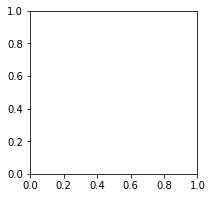

In [ ]:
#for i in auto['mpg'].groupby(auto['foreign']):
#  print(i)
fig, axs = plt.subplots(figsize = (3, 3))
i=0
for d in auto['mpg'].groupby(auto['foreign']):
  axs.hist(d)
  i=i+1


TypeError: ignored

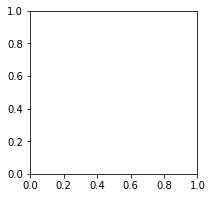

In [ ]:
fig, ax = plt.subplots(figsize = (3, 3))
for i,d in auto['mpg'].groupby(auto['foreign']):
  ax['i'].hist(d)

# to setup in all

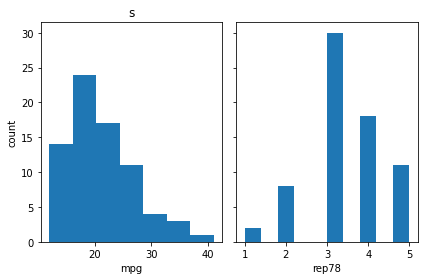

In [37]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #1row2col
axs[0].hist(auto.mpg, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#btw can do categorical var hist too: auto.rep78.value_counts() #same as bar chart
axs[1].hist(auto.rep78) 
axs[0].set_title('s')
axs[0].set_ylabel('count')
axs[0].set_xlabel('mpg')
axs[1].set_xlabel('rep78');

In [31]:
g = auto.groupby('foreign') #subset data into n groups
g.ngroups

2

In [33]:
for i, (grp, d) in enumerate(g):
  print(i,grp)

0 Domestic
1 Foreign


In [42]:
for i, (grp, d) in enumerate(g):
  d

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,Domestic
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,Domestic


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
52,Audi 5000,9690,17,5.0,3.0,15,2830,189,37,131,3.20,Foreign
53,Audi Fox,6295,23,3.0,2.5,11,2070,174,36,97,3.70,Foreign
54,BMW 320i,9735,25,4.0,2.5,12,2650,177,34,121,3.64,Foreign
55,Datsun 200,6229,23,4.0,1.5,6,2370,170,35,119,3.89,Foreign
56,Datsun 210,4589,35,5.0,2.0,8,2020,165,32,85,3.70,Foreign
57,Datsun 510,5079,24,4.0,2.5,8,2280,170,34,119,3.54,Foreign
58,Datsun 810,8129,21,4.0,2.5,8,2750,184,38,146,3.55,Foreign
59,Fiat Strada,4296,21,3.0,2.5,16,2130,161,36,105,3.37,Foreign
60,Honda Accord,5799,25,5.0,3.0,10,2240,172,36,107,3.05,Foreign
61,Honda Civic,4499,28,4.0,2.5,5,1760,149,34,91,3.30,Foreign


{'whiskers': [<matplotlib.lines.Line2D at 0x7efca6c3c040>,
 'caps': [<matplotlib.lines.Line2D at 0x7efca6c47760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efca6c3cb20>],
 'medians': [<matplotlib.lines.Line2D at 0x7efca69da220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efca69dae50>],
 'means': []}

Text(0.5, 1.0, 'Domestic')

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x7efca69da700>,
 'caps': [<matplotlib.lines.Line2D at 0x7efca6c63d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efca69da6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7efca6c37910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efca6c37ca0>],
 'means': []}

Text(0.5, 1.0, 'Foreign')

[]

''

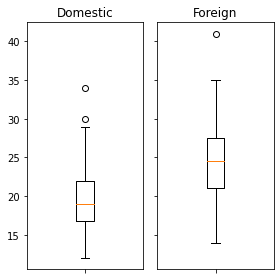

In [51]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(4, 3))
for i, (grp, d) in enumerate(g):
  axs[i].boxplot(d['mpg'])
  axs[i].set_title(grp)
  axs[i].set_xticklabels('')
;

#    ax = d.plot.bar(x='resource', y='average', ax=axes[i], title=country)
#    ax.legend().remove()
#


In [109]:
g = auto.groupby('rep78') #subset data into n groups
g.ngroups

5

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '1.0')

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '2.0')

(array([ 2.,  3.,  3.,  2., 10.,  5.,  1.,  1.,  1.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '3.0')

(array([3., 1., 2., 0., 2., 3., 4., 0., 2., 1.]),
 array([14. , 15.6, 17.2, 18.8, 20.4, 22. , 23.6, 25.2, 26.8, 28.4, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '4.0')

(array([4., 0., 0., 1., 0., 2., 0., 3., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5.0')

''

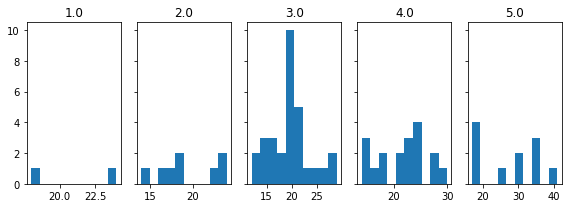

In [110]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(8, 3))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d['mpg'])
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

In [56]:
auto['longHeavy'] = (auto.weight >= auto.weight.mean()) & (auto.length >= auto.length.mean())

In [61]:
auto['longHeavy']

0     False
1     False
2     False
3      True
4      True
      ...  
69    False
70    False
71    False
72    False
73     True
Name: longHeavy, Length: 74, dtype: bool

In [67]:
g = auto.groupby(['foreign','rep78']) #subset data into n groups
g.ngroups

8

In [111]:
for i, (grp, d) in enumerate(g):
  print(i,grp)

0 1.0
1 2.0
2 3.0
3 4.0
4 5.0


In [66]:
#make it cleaner
auto.replace({'foreign' : { 'Domestic' : 'D', 'Foreign' : 'F' }},inplace=True)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 1.0)")

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 2.0)")

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 3.0)")

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 4.0)")

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('D', 5.0)")

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 3.0)")

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 4.0)")

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, "('F', 5.0)")

''

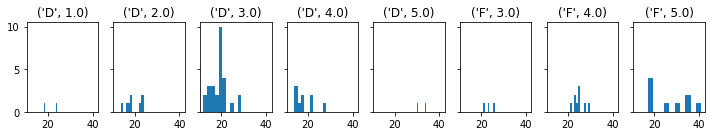

In [71]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True,sharex=True, tight_layout=True, figsize=(10, 2))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d['mpg'])
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

In [72]:
g = auto.groupby(['rep78']) #subset data into n groups
g.ngroups

5

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '1.0')

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '2.0')

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '3.0')

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '4.0')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5.0')

''

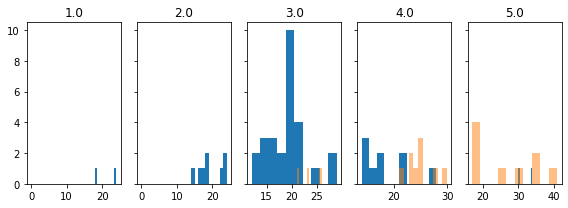

In [112]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(8, 3))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d.mpg[d.foreign=="D"])  
  axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([18. , 18.6, 19.2, 19.8, 20.4, 21. , 21.6, 22.2, 22.8, 23.4, 24. ]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '1.0')

(array([1., 0., 1., 1., 2., 0., 0., 0., 1., 2.]),
 array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 10 Patch objects>)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '2.0')

(array([ 2.,  3.,  3.,  2., 10.,  4.,  0.,  1.,  0.,  2.]),
 array([12. , 13.7, 15.4, 17.1, 18.8, 20.5, 22.2, 23.9, 25.6, 27.3, 29. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '3.0')

(array([3., 1., 2., 0., 0., 2., 0., 0., 0., 1.]),
 array([14. , 15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <a list of 10 Patch objects>)

(array([1., 0., 2., 1., 3., 0., 0., 1., 0., 1.]),
 array([21. , 21.9, 22.8, 23.7, 24.6, 25.5, 26.4, 27.3, 28.2, 29.1, 30. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '4.0')

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. ]),
 <a list of 10 Patch objects>)

(array([4., 0., 0., 1., 0., 1., 0., 2., 0., 1.]),
 array([17. , 19.4, 21.8, 24.2, 26.6, 29. , 31.4, 33.8, 36.2, 38.6, 41. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, '5.0')

''

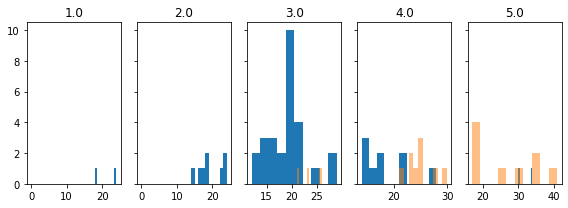

In [83]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(8, 3))
for i, (grp, d) in enumerate(g):
  axs[i].hist(d.mpg[d.foreign=="D"])  
  axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
;

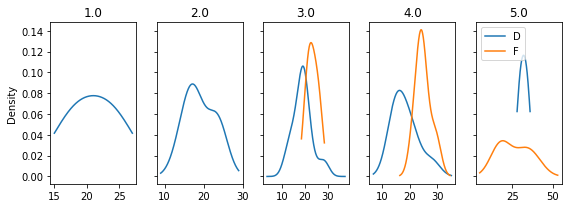

In [133]:
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(8, 3))
for i, (grp, d) in enumerate(g):
  #d.mpg[d.foreign=="D"].plot.kde(ax=axs[i]);
  d.mpg[d.foreign=="D"].plot(kind = 'density',ax=axs[i]) #pandas
  try:
    d.mpg[d.foreign=="F"].plot(kind = 'density',ax=axs[i]) #pandas #BUG brekas bc obs doesnt exist
  except Exception: 
    pass
  #axs[i].hist(d.mpg[d.foreign=="D"])  
  #axs[i].hist(d.mpg[d.foreign=="F"],alpha=.5)
  axs[i].set_title(grp)
  #axs[i].set_xticklabels('')
plt.legend(["D","F"],loc='upper left');

# single density withjou t looping

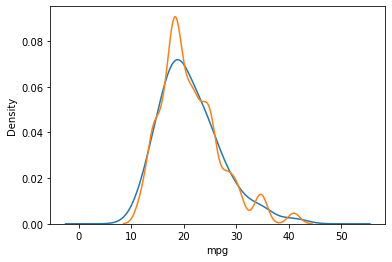

In [101]:
#auto.mpg.hist();
#auto.mpg.plot(kind = 'hist')
auto.mpg.plot(kind = 'density') #pandas
sns.kdeplot(auto.mpg, bw_method = .2) #sns Lower values lead to a more “wiggly” plot

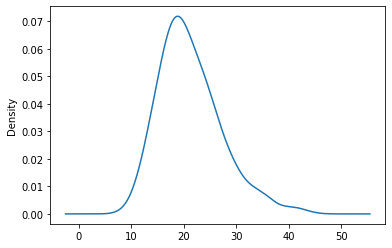

In [117]:
auto.mpg.plot.kde();